In [152]:
import numpy as np
import pandas as pd

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [153]:
df1 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link7.csv')
df2 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link2.csv')
df3 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link3.csv')
df4 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link4.csv')
df5 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link5.csv')
df6 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link6.csv')
df7 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link1.csv')
df8 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link8.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df2,df1,df7,df6,df8,df4,df5,df3])
df.reset_index(inplace=True)
df

,index,Timestamp,Tx_Packet,Rx_Packet,Dropped,BW_Utilization
0,0,2020-11-06 04:30:24,33,34,0,4.584070e+04
1,1,2020-11-06 04:31:21,35,33,0,4.626071e+04
2,2,2020-11-06 04:35:26,40,5,0,4.150660e+05
3,3,2020-11-06 04:35:27,143,1,0,4.224566e+06
4,4,2020-11-06 04:35:28,142,0,0,4.165482e+06
...,...,...,...,...,...,...
3401,120,2020-11-06 04:39:41,327,274,0,8.398220e+05
3402,121,2020-11-06 04:39:41,217,0,0,3.031080e+05
3403,122,2020-11-06 04:39:41,304,3,0,4.266560e+05
3404,123,2020-11-06 04:39:42,913,1,0,1.280100e+06


In [154]:
# Because we will predict BW Util

df = df.reset_index()['BW_Utilization']

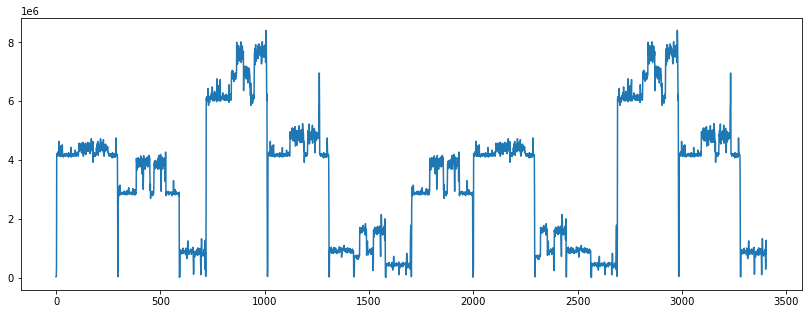

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize =(14,5))
plt.plot(df)

In [156]:
# Scaling data

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

df

array([[0.00298178],
       [0.00303186],
       [0.04701144],
       ...,
       [0.04839353],
       [0.15016566],
       [0.09962279]])

In [157]:
df.shape

(3406, 1)

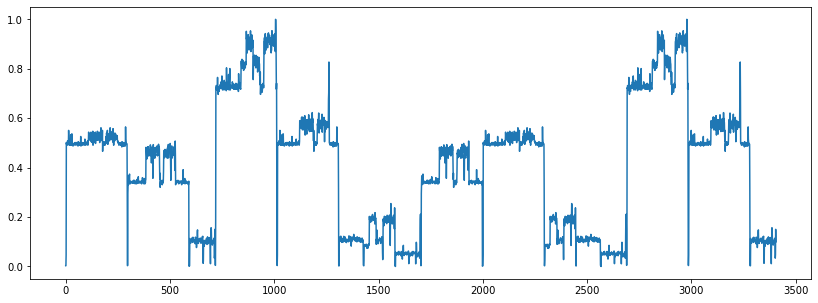

In [158]:
plt.figure(figsize =(14,5))
plt.plot(df)

In [159]:
training_size=int(len(df)*0.75)
test_size=len(df)-training_size


train_data, test_data = df[0:training_size,:] , df[training_size:len(df),:1]

In [160]:
import numpy
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [161]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [162]:
X_train.shape

(2353, 200)

In [163]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [164]:
from tensorflow.keras.regularizers import l2

In [165]:
model=Sequential()

model.add(LSTM(100,return_sequences=True,input_shape=(200,1), activation="relu", kernel_regularizer=l2(0.01)\
               , recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#model.add(LSTM(80, activation="relu",return_sequences=True, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)\
#               , bias_regularizer=l2(0.01)))
model.add(LSTM(50, activation="relu", kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)\
               , bias_regularizer=l2(0.01)))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [166]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStop=EarlyStopping(monitor="val_loss",verbose=1,mode='min',patience=10)

In [167]:
#Train the model

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks=[earlyStop])

Train on 2353 samples, validate on 651 samples
Epoch 1/100
2353/2353 [==============================] - 27s 12ms/sample - loss: 3.3896 - val_loss: 2.5238
Epoch 2/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 2.0801 - val_loss: 1.7294
Epoch 3/100
2353/2353 [==============================] - 21s 9ms/sample - loss: 1.5327 - val_loss: 1.3710
Epoch 4/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 1.2693 - val_loss: 1.1820
Epoch 5/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 1.1175 - val_loss: 1.0598
Epoch 6/100
2353/2353 [==============================] - 18s 8ms/sample - loss: 1.0108 - val_loss: 0.9656
Epoch 7/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 0.9237 - val_loss: 0.8854
Epoch 8/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 0.8466 - val_loss: 0.8114
Epoch 9/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 0.7762 - val_loss: 0.743

2353/2353 [==============================] - 23s 10ms/sample - loss: 0.0113 - val_loss: 0.0125
Epoch 78/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 0.0113 - val_loss: 0.0125
Epoch 79/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 0.0113 - val_loss: 0.0123
Epoch 80/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 0.0111 - val_loss: 0.0122
Epoch 81/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 0.0110 - val_loss: 0.0123
Epoch 82/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 0.0110 - val_loss: 0.0121
Epoch 83/100
2353/2353 [==============================] - 19s 8ms/sample - loss: 0.0112 - val_loss: 0.0121
Epoch 84/100
2353/2353 [==============================] - 20s 8ms/sample - loss: 0.0108 - val_loss: 0.0120
Epoch 85/100
2353/2353 [==============================] - 20s 8ms/sample - loss: 0.0108 - val_loss: 0.0119
Epoch 86/100
2353/2353 [=========================

In [168]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [169]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.05620466715709088

In [170]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.06540808528795164

In [171]:
mean_absolute_error(ytest,test_predict)

0.03182483581372333

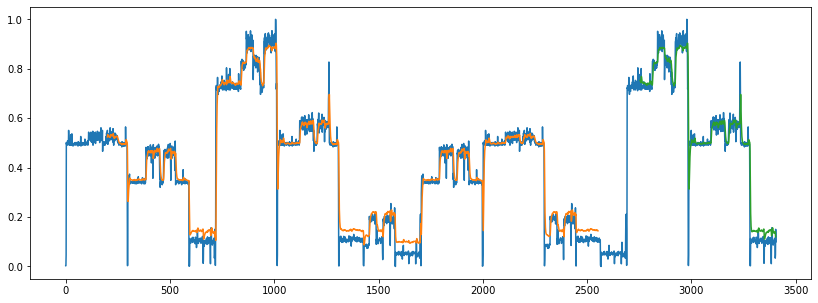

In [172]:
### Plotting 
# shift train predictions for plotting
# look back = timestep

look_back=200

trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize =(14,5))
#plt.plot(scaler.inverse_transform(df))
plt.plot(df)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#ORANGE = Train predicted Data
#GREEN = Test predicted Data

In [173]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [174]:
math.sqrt(mean_squared_error(y_train,train_predict))

3839313.107031896

In [175]:
math.sqrt(mean_squared_error(ytest,test_predict))

5156717.438021059

In [176]:
mean_absolute_error(ytest,test_predict)

4732775.427793937

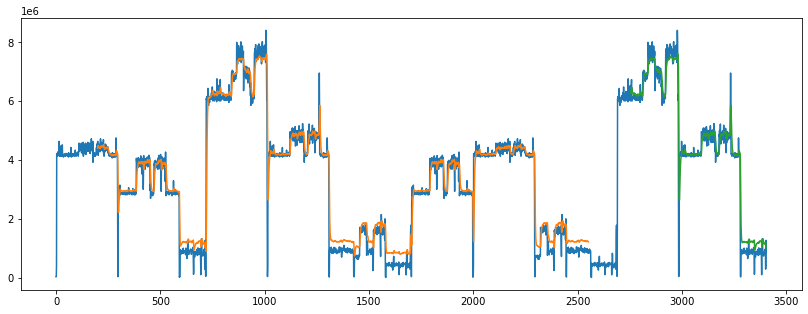

In [177]:
### Plotting 
# shift train predictions for plotting
# look back = timestep

look_back=200

trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize =(14,5))
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#ORANGE = Train predicted Data
#GREEN = Test predicted Data